In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import w_risk_kit as wrk

In [2]:
sp500ReturnsRaw = pd.read_csv('sp500returns.CSV', index_col=0)
sp500Returns = sp500ReturnsRaw.dropna(axis=0, how='all')
sp500Returns = sp500Returns.dropna(axis=1, how='any')
sp500Returns.head()

,AFL.N,AES.N,ABT.N,ABMD.OQ,ATVI.OQ,ADBE.OQ,AMD.OQ,AMG.N,APD.N,ALK.N,...,XYL.N,APTV.N,TRIP.OQ,KORS.N,FLT.N,FB.OQ,PSX.N,ABBV.N,QRVO.OQ,EVHC.N
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.001130,0.013084,0.081047,0.036404,0.072505,0.003981,0.083333,0.105878,0.040551,0.070534,...,0.030627,0.010612,0.102955,0.099941,0.115377,0.162974,0.140678,0.074063,0.116071,0.039987
2013-02-28,-0.058424,0.071956,-0.002656,0.149821,0.255487,0.038858,-0.042308,0.015980,-0.012495,0.117469,...,-0.015396,0.082458,-0.017718,0.056120,0.166611,-0.120116,0.039458,0.006269,-0.078000,-0.032361
2013-03-31,0.041233,0.081756,0.045280,0.163965,0.018881,0.107125,0.024096,0.050195,0.009020,0.240497,...,0.002182,0.061056,0.155301,-0.042004,0.098267,-0.061284,0.111341,0.104550,0.154013,0.113907
2013-04-30,0.046521,0.102625,0.045300,-0.010712,0.026081,0.036084,0.105882,0.013740,-0.001862,-0.036273,...,0.006894,0.040602,0.001142,0.002641,0.003000,0.085223,-0.128912,0.129230,0.054511,-0.002378
2013-05-31,0.023145,-0.119769,-0.006771,0.167840,-0.034783,-0.048137,0.418440,0.053443,0.085707,-0.078196,...,0.014054,0.056331,0.226512,0.103267,0.132380,-0.122839,0.092207,-0.072964,-0.016043,0.058701


In [3]:
wrk.std_distr_analysis(sp500Returns,12,0.02)

,AFL.N,AES.N,ABT.N,ABMD.OQ,ATVI.OQ,ADBE.OQ,AMD.OQ,AMG.N,APD.N,ALK.N,...,XYL.N,APTV.N,TRIP.OQ,KORS.N,FLT.N,FB.OQ,PSX.N,ABBV.N,QRVO.OQ,EVHC.N
Annualized Return,0.105675,0.002418,0.127358,0.693361,0.429168,0.359892,0.337693,0.095388,0.161313,0.278144,...,0.202716,0.214986,-0.038618,0.042879,0.291043,0.459671,0.13756,0.231376,0.300251,0.028636
Annualized Volatility,0.14207,0.217738,0.191557,0.398967,0.271006,0.196071,0.52828,0.239814,0.174746,0.312583,...,0.212699,0.221066,0.43755,0.360774,0.277306,0.318849,0.216451,0.224713,0.430891,0.302837
Skewness,-0.262084,0.201748,-0.532839,0.196738,0.355229,0.434927,0.60498,-0.409614,0.860455,0.167967,...,0.780156,-1.188921,0.65304,0.9702,-0.013627,1.850335,0.139038,-0.171746,-0.040503,-0.300911
Kurtosis,2.914283,4.640799,3.846904,3.233578,3.934931,2.786081,2.827622,3.302256,4.534563,2.487377,...,4.904804,6.412847,3.436287,6.009468,2.649741,10.602283,2.778622,2.693237,3.050013,2.858936
Is Normal,True,True,True,True,True,True,True,True,False,True,...,False,False,True,False,True,False,True,True,True,True
Sharpe Ratio,0.592114,-0.079469,0.550233,1.657605,1.48277,1.702526,0.590193,0.308504,0.794062,0.810831,...,0.843503,0.866045,-0.131871,0.062001,0.959736,1.354223,0.53321,0.923648,0.638381,0.027742
Gaussian VaR (95%),0.057661,0.100384,0.078633,0.13677,0.094512,0.064859,0.213564,0.102904,0.068534,0.122622,...,0.082871,0.08564,0.201752,0.161301,0.105958,0.114406,0.089226,0.086259,0.173213,0.136401
Cornish-Fisher VaR (95%),0.060709,0.094698,0.085709,0.129761,0.085031,0.057963,0.187044,0.110262,0.054055,0.119228,...,0.066332,0.100988,0.176395,0.124721,0.106826,0.046526,0.087031,0.089762,0.174505,0.143916
Monthly Historic VaR (95%),0.06305,0.088916,0.090912,0.120126,0.092733,0.04829,0.179054,0.098805,0.059437,0.124095,...,0.074807,0.08263,0.171637,0.112982,0.10948,0.097167,0.073283,0.07932,0.187722,0.124526
Monthly Historic CVaR (95%),0.077626,0.138833,0.125226,0.193202,0.12309,0.059348,0.203846,0.150671,0.071052,0.133714,...,0.093271,0.149564,0.228067,0.189584,0.134262,0.121008,0.116761,0.117442,0.2295,0.175775


In [4]:
U, S, VT = np.linalg.svd(sp500Returns, full_matrices=False)
S = np.diag(S)

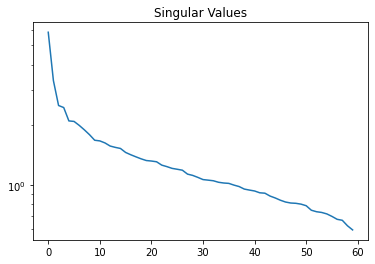

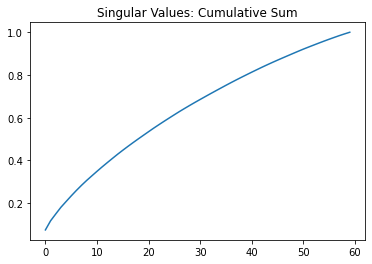

In [5]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [6]:
dfU = pd.DataFrame(U, index = sp500Returns.index)
dfVT = pd.DataFrame(VT, columns=sp500Returns.columns)
dfUS = dfU*np.diag(S).T
dfSVT = (np.diag(S)*dfVT.T).T

In [7]:
wrk.std_distr_analysis(dfU,12,0.02)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Annualized Return,0.699933,0.434666,0.152746,-0.135228,0.110815,-0.073335,0.077405,0.014784,-0.275642,-0.336774,...,-0.303112,-0.015107,0.076056,-0.357926,-0.137455,0.144584,-0.174297,-0.031451,-0.320163,0.334756
Annualized Volatility,0.412725,0.430796,0.44507,0.450834,0.44724,0.4507,0.448172,0.449723,0.446583,0.442504,...,0.4447,0.450385,0.448271,0.44085,0.450812,0.445787,0.450251,0.450477,0.44377,0.437402
Skewness,-0.149828,-0.277372,-0.905049,-0.143797,0.629366,-1.946388,0.179511,0.012193,0.196528,-0.371005,...,0.37581,0.927382,0.373969,-0.537816,-0.082826,-0.080849,0.241068,-0.338709,-0.167168,1.202456
Kurtosis,3.130947,3.583432,4.832406,3.019618,3.697431,10.115432,3.168861,3.867148,4.797491,3.233163,...,2.803539,6.614738,3.055104,5.021285,3.651903,3.374671,4.617283,4.051443,3.562059,5.658643
Is Normal,True,True,False,True,True,False,True,True,True,True,...,True,False,True,False,True,True,True,True,True,False
Sharpe Ratio,1.617934,0.945,0.292409,-0.338427,0.199053,-0.204,0.125401,-0.011778,-0.650241,-0.791811,...,-0.713584,-0.07688,0.122434,-0.84189,-0.343292,0.274044,-0.424025,-0.112561,-0.752818,0.706426
Gaussian VaR (95%),0.142294,0.164645,0.188718,0.215651,0.193975,0.207602,0.196622,0.202094,0.228275,0.233278,...,0.230872,0.205393,0.196923,0.234795,0.215866,0.190353,0.21938,0.205967,0.231955,0.174504
Cornish-Fisher VaR (95%),0.146964,0.172738,0.214823,0.220824,0.168317,0.251277,0.18956,0.199394,0.216403,0.245714,...,0.21744,0.159918,0.182802,0.248254,0.21719,0.192305,0.206201,0.215369,0.236484,0.121588
Monthly Historic VaR (95%),0.123227,0.177254,0.14859,0.20931,0.180114,0.187212,0.146606,0.215694,0.187545,0.242417,...,0.177787,0.172712,0.197346,0.17117,0.223584,0.190179,0.2459,0.176632,0.189619,0.117322
Monthly Historic CVaR (95%),0.208382,0.255764,0.330199,0.281913,0.208695,0.376806,0.235013,0.281025,0.289246,0.322175,...,0.261074,0.241196,0.231094,0.317612,0.301425,0.250409,0.266247,0.311013,0.288273,0.18193


<AxesSubplot:xlabel='0', ylabel='1'>

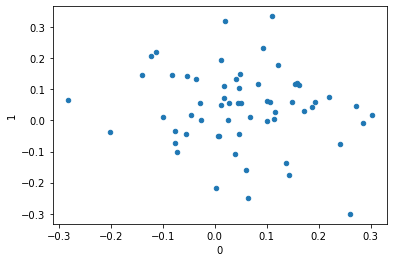

In [8]:
dfU.iloc[:,:2].plot.scatter(x=0, y=1)

In [9]:
wrk.std_distr_analysis(dfU.iloc[:,:2].dot(dfSVT.iloc[:2,:]),12,0.02)

,AFL.N,AES.N,ABT.N,ABMD.OQ,ATVI.OQ,ADBE.OQ,AMD.OQ,AMG.N,APD.N,ALK.N,...,XYL.N,APTV.N,TRIP.OQ,KORS.N,FLT.N,FB.OQ,PSX.N,ABBV.N,QRVO.OQ,EVHC.N
Annualized Return,0.137311,0.137641,0.267719,0.339738,0.299896,0.253184,0.312148,0.187773,0.199395,0.343727,...,0.173843,0.266912,0.271918,0.061796,0.256774,0.246148,0.127119,0.247007,0.388518,0.076802
Annualized Volatility,0.089199,0.08474,0.131988,0.174998,0.140429,0.119523,0.27737,0.183991,0.118124,0.157288,...,0.114754,0.140163,0.193441,0.040295,0.160926,0.115397,0.128282,0.139297,0.176253,0.077424
Skewness,-0.144205,-0.165913,-0.211279,-0.143977,-0.148435,-0.194008,-0.020337,0.013015,-0.175326,-0.16019,...,-0.134672,-0.206325,-0.098685,-0.149389,-0.149504,-0.180921,0.024184,-0.188656,-0.156384,0.025414
Kurtosis,3.13455,3.11541,2.815052,2.63262,2.361501,2.569688,3.129999,3.12331,3.101231,2.377254,...,3.139068,2.979186,3.144209,3.131258,3.131177,2.472968,3.121636,3.070293,2.367961,3.121474
Is Normal,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Sharpe Ratio,1.29154,1.363322,1.843261,1.794428,1.957529,1.916047,1.034261,0.89539,1.491456,2.021433,...,1.316556,1.730079,1.278907,1.018583,1.444931,1.924667,0.819953,1.600464,2.053546,0.720413
Gaussian VaR (95%),0.030896,0.028804,0.041478,0.056495,0.04323,0.036716,0.104603,0.07082,0.039787,0.048139,...,0.040051,0.045291,0.069325,0.013898,0.055497,0.03529,0.049713,0.046238,0.054013,0.030026
Cornish-Fisher VaR (95%),0.031864,0.029879,0.043856,0.058897,0.045427,0.038875,0.104853,0.070494,0.041383,0.050734,...,0.041206,0.047629,0.070707,0.014352,0.057314,0.03732,0.04937,0.048293,0.056876,0.029811
Monthly Historic VaR (95%),0.027214,0.023531,0.032473,0.055761,0.046745,0.031724,0.111854,0.076215,0.031111,0.04931,...,0.0362,0.033133,0.067468,0.012052,0.04811,0.034628,0.053458,0.033616,0.055595,0.032319
Monthly Historic CVaR (95%),0.045116,0.042485,0.061177,0.073305,0.056942,0.05327,0.139797,0.092365,0.058871,0.065854,...,0.05818,0.066664,0.098443,0.020348,0.08126,0.049881,0.064655,0.068575,0.073164,0.039038


<AxesSubplot:xlabel='DATE'>

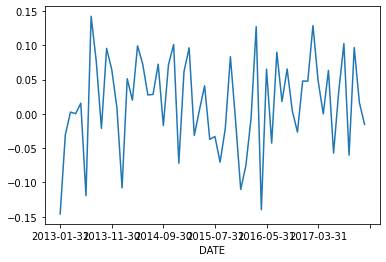

In [10]:
dfUS.iloc[:,:60].dot(dfVT.iloc[:60,:])['AAPL.OQ'].plot()

<AxesSubplot:xlabel='DATE'>

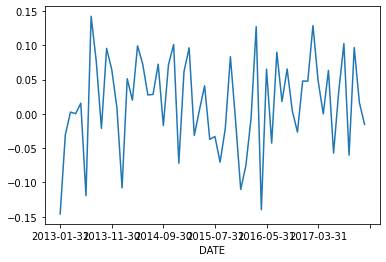

In [11]:
sp500Returns['AAPL.OQ'].plot()

<AxesSubplot:>

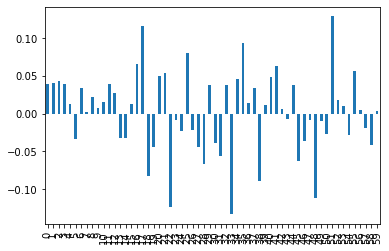

In [12]:
dfVT['AAPL.OQ'].plot.bar()

<AxesSubplot:>

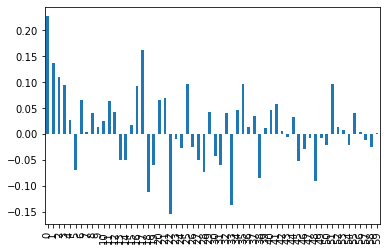

In [13]:
dfSVT['AAPL.OQ'].plot.bar()

In [14]:
dfU.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.052039,0.038197,0.020846,-0.003373,0.016610,0.004612,0.014402,0.009661,-0.017999,-0.024923,...,-0.021483,0.006673,0.014148,-0.027218,-0.003599,0.019549,-0.007377,0.006142,-0.023004,0.031448
std,0.119143,0.124360,0.128481,0.130144,0.129107,0.130106,0.129376,0.129824,0.128917,0.127740,...,0.128374,0.130015,0.129405,0.127263,0.130138,0.128688,0.129976,0.130041,0.128105,0.126267
min,-0.282619,-0.300663,-0.441383,-0.368410,-0.211341,-0.615329,-0.332820,-0.342348,-0.432845,-0.386579,...,-0.290467,-0.310989,-0.240999,-0.508885,-0.320972,-0.326121,-0.293832,-0.406988,-0.431878,-0.229949
25%,-0.027807,-0.034698,-0.043382,-0.082652,-0.067430,-0.038820,-0.082887,-0.056049,-0.100333,-0.088721,...,-0.122208,-0.053677,-0.053403,-0.114148,-0.066508,-0.041502,-0.072741,-0.062837,-0.116865,-0.048749
50%,0.047168,0.051883,0.031095,-0.005870,0.018914,0.018753,0.016140,0.011487,-0.006716,-0.027700,...,-0.031279,0.019945,0.011357,-0.031323,0.003032,0.019833,0.000634,0.003002,-0.017890,0.010711
75%,0.124711,0.118306,0.104040,0.105093,0.083477,0.090699,0.086215,0.069020,0.041760,0.054042,...,0.063302,0.059791,0.088769,0.032105,0.059487,0.085745,0.067122,0.075494,0.070929,0.082992
max,0.302569,0.335165,0.244430,0.287346,0.404700,0.250324,0.328497,0.338408,0.372272,0.243209,...,0.312862,0.524112,0.301332,0.243676,0.368459,0.362032,0.450321,0.292951,0.267565,0.493988


In [15]:
(wrk.std_distr_analysis(sp500Returns,12,0.02).T)[['Annualized Return', 'Annualized Volatility','Sharpe Ratio','Skewness','Kurtosis']].mean()

Annualized Return        0.149812
Annualized Volatility    0.223247
Sharpe Ratio             0.611543
Skewness                 0.041117
Kurtosis                 3.526599
dtype: float64

In [16]:
dfU.dot(dfSVT).head()

,AFL.N,AES.N,ABT.N,ABMD.OQ,ATVI.OQ,ADBE.OQ,AMD.OQ,AMG.N,APD.N,ALK.N,...,XYL.N,APTV.N,TRIP.OQ,KORS.N,FLT.N,FB.OQ,PSX.N,ABBV.N,QRVO.OQ,EVHC.N
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.001130,0.013084,0.081047,0.036404,0.072505,0.003981,0.083333,0.105878,0.040551,0.070534,...,0.030627,0.010612,0.102955,0.099941,0.115377,0.162974,0.140678,0.074063,0.116071,0.039987
2013-02-28,-0.058424,0.071956,-0.002656,0.149821,0.255487,0.038858,-0.042308,0.015980,-0.012495,0.117469,...,-0.015396,0.082458,-0.017718,0.056120,0.166611,-0.120116,0.039458,0.006269,-0.078000,-0.032361
2013-03-31,0.041233,0.081756,0.045280,0.163965,0.018881,0.107125,0.024096,0.050195,0.009020,0.240497,...,0.002182,0.061056,0.155301,-0.042004,0.098267,-0.061284,0.111341,0.104550,0.154013,0.113907
2013-04-30,0.046521,0.102625,0.045300,-0.010712,0.026081,0.036084,0.105882,0.013740,-0.001862,-0.036273,...,0.006894,0.040602,0.001142,0.002641,0.003000,0.085223,-0.128912,0.129230,0.054511,-0.002378
2013-05-31,0.023145,-0.119769,-0.006771,0.167840,-0.034783,-0.048137,0.418440,0.053443,0.085707,-0.078196,...,0.014054,0.056331,0.226512,0.103267,0.132380,-0.122839,0.092207,-0.072964,-0.016043,0.058701


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

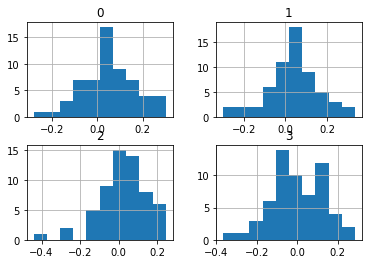

In [17]:
dfU.iloc[:,:4].hist()

In [18]:
dfSVT.T.iloc[:,:5].sort_values(by=0, ascending = False).head()

,0,1,2,3,4
URI.N,0.698919,-0.301232,0.062816,0.018092,0.075113
AMD.OQ,0.624408,-0.170073,0.137092,-0.041099,0.127205
FCX.N,0.612934,-0.760053,-0.084991,0.435808,-0.164466
NKTR.OQ,0.606916,0.428528,-0.513494,-0.673780,1.237624
MRO.N,0.527871,-0.562957,-0.249233,0.208081,0.210808


<AxesSubplot:xlabel='0', ylabel='1'>

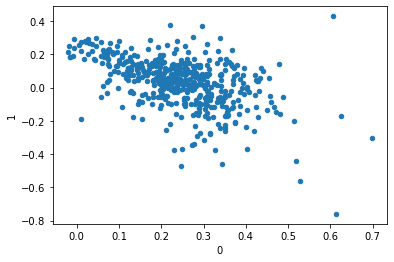

In [19]:
dfSVT.T.iloc[:,:].plot.scatter(x=0, y=1)

In [20]:
(np.cumsum(np.diag(S))/np.sum(np.diag(S)))[:19]

array([0.07449373, 0.11713513, 0.14912572, 0.18036594, 0.20714442,
       0.23376503, 0.25920668, 0.28336294, 0.30620442, 0.32763282,
       0.34889628, 0.36966444, 0.38970424, 0.40943688, 0.42892358,
       0.44753268, 0.46565379, 0.48334509, 0.50063495])

In [21]:
np.diag(S)

array([5.81855163, 3.33063217, 2.49871909, 2.44010939, 2.0916115 ,
       2.07928094, 1.98719515, 1.88679574, 1.78410049, 1.6737285 ,
       1.66084509, 1.62215816, 1.56526724, 1.54127628, 1.52206592,
       1.45351814, 1.41540271, 1.38183138, 1.3504751 , 1.32435479,
       1.31657588, 1.30539249, 1.25595624, 1.23436685, 1.20969827,
       1.19739059, 1.1845582 , 1.13200934, 1.11550355, 1.09016766,
       1.0629559 , 1.05605665, 1.04857746, 1.03057287, 1.0218274 ,
       1.0173469 , 0.99725268, 0.98086727, 0.95271045, 0.9416799 ,
       0.93186198, 0.91262961, 0.90842849, 0.87875626, 0.85975339,
       0.83754883, 0.82042747, 0.81110079, 0.80835945, 0.8006102 ,
       0.78624836, 0.74633619, 0.73359291, 0.72743235, 0.71533507,
       0.69493889, 0.67208398, 0.66452121, 0.62392222, 0.59466643])

In [22]:
dfSVT.melt(ignore_index=False)

,variable,value
0,AFL.N,0.215654
1,AFL.N,-0.003118
2,AFL.N,-0.038187
3,AFL.N,0.030002
4,AFL.N,0.005197
...,...,...
55,EVHC.N,0.008030
56,EVHC.N,0.019059
57,EVHC.N,0.016310
58,EVHC.N,0.030209


In [23]:
fullRets = wrk.annualize_rets(sp500Returns,12)
fourPartRets = wrk.annualize_rets(dfU.iloc[:,:4].dot(dfSVT.iloc[:4,:]),12)
lastFourPartRets = wrk.annualize_rets(dfU.iloc[:,-4:].dot(dfSVT.iloc[-4:,:]),12)
fullCov = sp500Returns.cov()
fourPartCov = dfU.iloc[:,:4].dot(dfSVT.iloc[:4,:]).cov()
lastFourPartCov = dfU.iloc[:,-4:].dot(dfSVT.iloc[-4:,:]).cov()

In [24]:
fullWeights = pd.DataFrame(wrk.msr(0, fullRets, fullCov), index=sp500Returns.columns)
fourPartWeights = pd.DataFrame(wrk.msr(0, fourPartRets, fourPartCov), index=sp500Returns.columns)
lastFourPartWeights = pd.DataFrame(wrk.msr(0, lastFourPartRets, lastFourPartCov), index=sp500Returns.columns)
equalWeights = pd.DataFrame(np.repeat(1/len(fullRets),len(fullRets)),index=fullRets.index)

<AxesSubplot:>

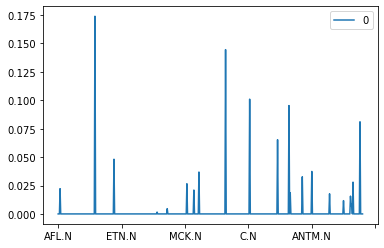

In [25]:
fullWeights.plot()

<AxesSubplot:>

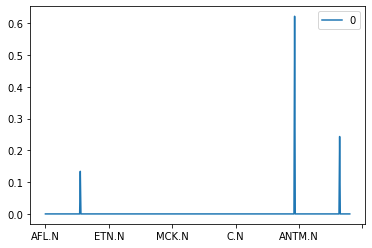

In [26]:
fourPartWeights.plot()

<AxesSubplot:>

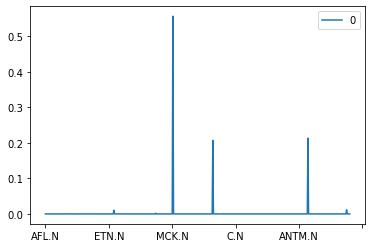

In [27]:
lastFourPartWeights.plot()

<AxesSubplot:>

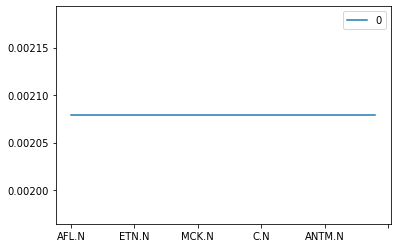

In [28]:
equalWeights.plot()

In [29]:
wrk.portfolio_return(equalWeights, fullRets)

0    0.149812
dtype: float64

In [30]:
wrk.portfolio_vol(equalWeights.values, fullCov.values)

array([[0.028698]])

<AxesSubplot:>

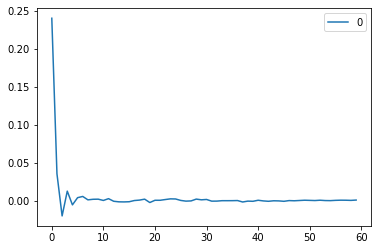

In [31]:
equalWeights.T.dot(dfSVT.T).T.plot()

<AxesSubplot:>

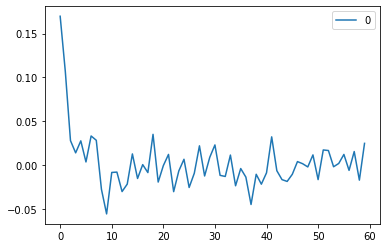

In [32]:
fullWeights.T.dot(dfSVT.T).T.plot()

<AxesSubplot:>

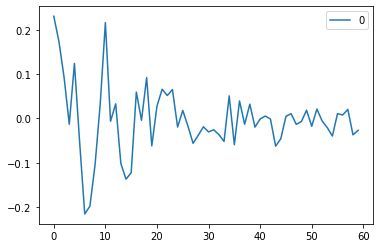

In [33]:
fourPartWeights.T.dot(dfSVT.T).T.plot()

<AxesSubplot:>

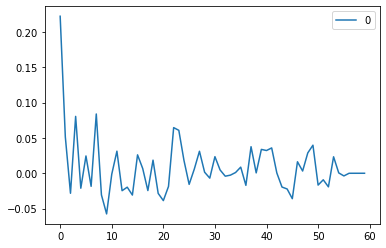

In [34]:
lastFourPartWeights.T.dot(dfSVT.T).T.plot()

In [35]:
sp500Returns.describe()

,AFL.N,AES.N,ABT.N,ABMD.OQ,ATVI.OQ,ADBE.OQ,AMD.OQ,AMG.N,APD.N,ALK.N,...,XYL.N,APTV.N,TRIP.OQ,KORS.N,FLT.N,FB.OQ,PSX.N,ABBV.N,QRVO.OQ,EVHC.N
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.009233,0.002139,0.011563,0.051085,0.033093,0.027462,0.035180,0.010014,0.013745,0.024559,...,0.017279,0.018450,0.004271,0.008571,0.024613,0.035726,0.012691,0.019549,0.029674,0.006191
std,0.041012,0.062856,0.055298,0.115172,0.078233,0.056601,0.152501,0.069228,0.050445,0.090235,...,0.061401,0.063816,0.126310,0.104146,0.080051,0.092044,0.062484,0.064869,0.124387,0.087421
min,-0.085233,-0.184167,-0.157203,-0.205908,-0.151957,-0.065234,-0.233449,-0.188739,-0.085659,-0.141307,...,-0.104282,-0.242585,-0.251241,-0.248303,-0.148089,-0.122839,-0.128912,-0.128185,-0.278062,-0.250469
25%,-0.014365,-0.029249,-0.009772,-0.033949,-0.016322,-0.018066,-0.066369,-0.031803,-0.021234,-0.051872,...,-0.015657,-0.015430,-0.075270,-0.054516,-0.037538,-0.006706,-0.023035,-0.023661,-0.040715,-0.069704
50%,0.018682,-0.005488,0.011592,0.038649,0.029005,0.033643,0.014400,0.015106,0.009265,0.027083,...,0.013863,0.025422,-0.015413,-0.004204,0.039674,0.021733,0.008744,0.017194,0.024282,0.021567
75%,0.033778,0.033052,0.045547,0.111299,0.074595,0.054878,0.107714,0.053636,0.040783,0.082791,...,0.049405,0.056610,0.063682,0.064128,0.070408,0.074018,0.041053,0.070810,0.119421,0.073850
max,0.096663,0.204082,0.138387,0.359432,0.260870,0.174152,0.418440,0.170957,0.186393,0.240497,...,0.235231,0.147125,0.331891,0.419799,0.222065,0.481496,0.158902,0.180080,0.328330,0.199315


In [70]:
sp500Returns.rolling(36).mean().dropna().melt(var_name = 'Stock', value_name = 'Return', ignore_index= False).sort_index(ascending= False)

TypeError: unstack() got an unexpected keyword argument 'var_name'

In [72]:
sp500Returns.rolling(36).mean().dropna().unstack()

        DATE      
AFL.N   2015-12-31    0.004378
        2016-01-31    0.003509
        2016-02-29    0.005880
        2016-03-31    0.006424
        2016-04-30    0.007701
                        ...   
EVHC.N  2017-08-31    0.002765
        2017-09-30    0.000742
        2017-10-31   -0.002908
        2017-11-30   -0.008610
        2017-12-31   -0.008024
Length: 12025, dtype: float64

In [38]:
sp500Returns.rolling(36).std().dropna()

,AFL.N,AES.N,ABT.N,ABMD.OQ,ATVI.OQ,ADBE.OQ,AMD.OQ,AMG.N,APD.N,ALK.N,...,XYL.N,APTV.N,TRIP.OQ,KORS.N,FLT.N,FB.OQ,PSX.N,ABBV.N,QRVO.OQ,EVHC.N
DATE,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0.046093,0.065976,0.051091,0.134167,0.080989,0.057137,0.133279,0.057518,0.058423,0.087935,...,0.070808,0.053861,0.136075,0.083459,0.078823,0.110967,0.072705,0.067470,0.133371,0.071289
2016-01-31,0.046492,0.065940,0.056902,0.135530,0.084052,0.058502,0.138855,0.061442,0.058609,0.092022,...,0.070848,0.069832,0.141389,0.081564,0.082409,0.109204,0.069613,0.068411,0.139473,0.072086
2016-02-29,0.045407,0.064992,0.056972,0.136126,0.077626,0.059611,0.138734,0.061642,0.058715,0.090982,...,0.070904,0.068953,0.141917,0.107799,0.078739,0.106768,0.069502,0.068473,0.139414,0.073235
2016-03-31,0.045957,0.072314,0.057943,0.136654,0.077951,0.059395,0.149050,0.067441,0.059980,0.084892,...,0.072198,0.070961,0.140183,0.107511,0.081375,0.105302,0.068712,0.066919,0.138663,0.072683
2016-04-30,0.047708,0.070711,0.058911,0.136297,0.077962,0.059433,0.153288,0.067841,0.059906,0.088939,...,0.072202,0.071091,0.140358,0.108753,0.081365,0.105131,0.065438,0.064578,0.140557,0.073215
2016-05-31,0.047635,0.067854,0.058941,0.135029,0.079436,0.058426,0.144806,0.067374,0.059022,0.088297,...,0.072783,0.072372,0.135742,0.111171,0.079733,0.101307,0.064102,0.063080,0.141362,0.075003
2016-06-30,0.047542,0.070935,0.058288,0.134964,0.079187,0.058978,0.145986,0.074630,0.058637,0.089859,...,0.072158,0.073769,0.135671,0.114438,0.079026,0.102253,0.060704,0.062822,0.141174,0.074781
2016-07-31,0.046632,0.070729,0.061977,0.133751,0.068785,0.058920,0.154355,0.072994,0.051137,0.088824,...,0.070969,0.074343,0.130955,0.113764,0.077994,0.070650,0.061006,0.061817,0.141820,0.073768
2016-08-31,0.045244,0.070766,0.060849,0.132661,0.065788,0.058291,0.152078,0.072980,0.049950,0.087233,...,0.071175,0.074502,0.132819,0.112720,0.075562,0.069215,0.059583,0.060947,0.142853,0.077431


In [39]:
'sp500Returns.iloc[-36:,:].corr().dropna()'

'sp500Returns.iloc[-36:,:].corr().dropna()'

In [40]:
sp500Returns.mean()

AFL.N      0.009233
AES.N      0.002139
ABT.N      0.011563
ABMD.OQ    0.051085
ATVI.OQ    0.033093
             ...   
FB.OQ      0.035726
PSX.N      0.012691
ABBV.N     0.019549
QRVO.OQ    0.029674
EVHC.N     0.006191
Length: 481, dtype: float64

In [41]:
sp500Returns.head()

,AFL.N,AES.N,ABT.N,ABMD.OQ,ATVI.OQ,ADBE.OQ,AMD.OQ,AMG.N,APD.N,ALK.N,...,XYL.N,APTV.N,TRIP.OQ,KORS.N,FLT.N,FB.OQ,PSX.N,ABBV.N,QRVO.OQ,EVHC.N
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.001130,0.013084,0.081047,0.036404,0.072505,0.003981,0.083333,0.105878,0.040551,0.070534,...,0.030627,0.010612,0.102955,0.099941,0.115377,0.162974,0.140678,0.074063,0.116071,0.039987
2013-02-28,-0.058424,0.071956,-0.002656,0.149821,0.255487,0.038858,-0.042308,0.015980,-0.012495,0.117469,...,-0.015396,0.082458,-0.017718,0.056120,0.166611,-0.120116,0.039458,0.006269,-0.078000,-0.032361
2013-03-31,0.041233,0.081756,0.045280,0.163965,0.018881,0.107125,0.024096,0.050195,0.009020,0.240497,...,0.002182,0.061056,0.155301,-0.042004,0.098267,-0.061284,0.111341,0.104550,0.154013,0.113907
2013-04-30,0.046521,0.102625,0.045300,-0.010712,0.026081,0.036084,0.105882,0.013740,-0.001862,-0.036273,...,0.006894,0.040602,0.001142,0.002641,0.003000,0.085223,-0.128912,0.129230,0.054511,-0.002378
2013-05-31,0.023145,-0.119769,-0.006771,0.167840,-0.034783,-0.048137,0.418440,0.053443,0.085707,-0.078196,...,0.014054,0.056331,0.226512,0.103267,0.132380,-0.122839,0.092207,-0.072964,-0.016043,0.058701


In [42]:
uU, sS, vVT = np.linalg.svd((sp500Returns - sp500Returns.mean())/np.sqrt(len(sp500Returns)), full_matrices=0)

<AxesSubplot:xlabel='DATE'>

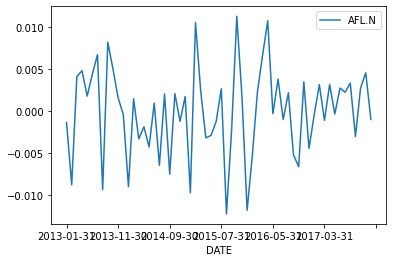

In [59]:
((sp500Returns - sp500Returns.mean())/np.sqrt(len(sp500Returns))).iloc[:,:1].plot()

In [63]:
sp500Returns.corr()

,AFL.N,AES.N,ABT.N,ABMD.OQ,ATVI.OQ,ADBE.OQ,AMD.OQ,AMG.N,APD.N,ALK.N,...,XYL.N,APTV.N,TRIP.OQ,KORS.N,FLT.N,FB.OQ,PSX.N,ABBV.N,QRVO.OQ,EVHC.N
AFL.N,1.000000,0.375856,0.401532,-0.003094,0.116243,0.417518,0.336911,0.487011,0.520547,-0.016537,...,0.505661,0.396738,0.348526,0.089337,0.250038,0.210259,0.308671,0.430783,0.088990,0.227017
AES.N,0.375856,1.000000,0.410673,-0.031862,0.209404,0.287822,0.132670,0.357847,0.269783,0.058253,...,0.302479,0.303720,0.254638,-0.007077,0.281182,0.104902,0.245143,0.426688,0.124440,0.085380
ABT.N,0.401532,0.410673,1.000000,0.179292,0.313994,0.391291,0.276769,0.510063,0.497584,0.341311,...,0.399819,0.539168,0.485986,0.084421,0.466394,0.174505,0.337475,0.582418,0.389684,0.148280
ABMD.OQ,-0.003094,-0.031862,0.179292,1.000000,0.150258,0.000853,-0.031549,0.062608,0.190038,0.309442,...,-0.059424,0.117554,0.019598,0.049573,0.131818,-0.193584,0.049157,0.013442,0.028261,0.320277
ATVI.OQ,0.116243,0.209404,0.313994,0.150258,1.000000,0.504930,0.126373,0.136476,0.283931,0.126526,...,0.031132,0.411700,0.355910,-0.142095,0.301132,0.295270,0.129333,0.084389,0.174505,0.128435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FB.OQ,0.210259,0.104902,0.174505,-0.193584,0.295270,0.282343,-0.106420,0.137369,0.328989,0.010219,...,0.005640,0.052965,0.308411,-0.012566,0.167040,1.000000,-0.031723,0.142123,0.052996,-0.026247
PSX.N,0.308671,0.245143,0.337475,0.049157,0.129333,0.075732,0.205813,0.432602,0.342628,0.186600,...,0.319543,0.227581,0.394119,0.170856,0.326593,-0.031723,1.000000,0.263032,-0.020521,0.157680
ABBV.N,0.430783,0.426688,0.582418,0.013442,0.084389,0.266751,0.133742,0.502007,0.413213,0.207122,...,0.424184,0.331171,0.201005,0.040028,0.195826,0.142123,0.263032,1.000000,0.010634,0.019656
QRVO.OQ,0.088990,0.124440,0.389684,0.028261,0.174505,0.233017,0.139127,0.090980,0.229007,0.176214,...,0.142359,0.394073,0.178207,0.106666,0.207309,0.052996,-0.020521,0.010634,1.000000,0.176825


<AxesSubplot:>

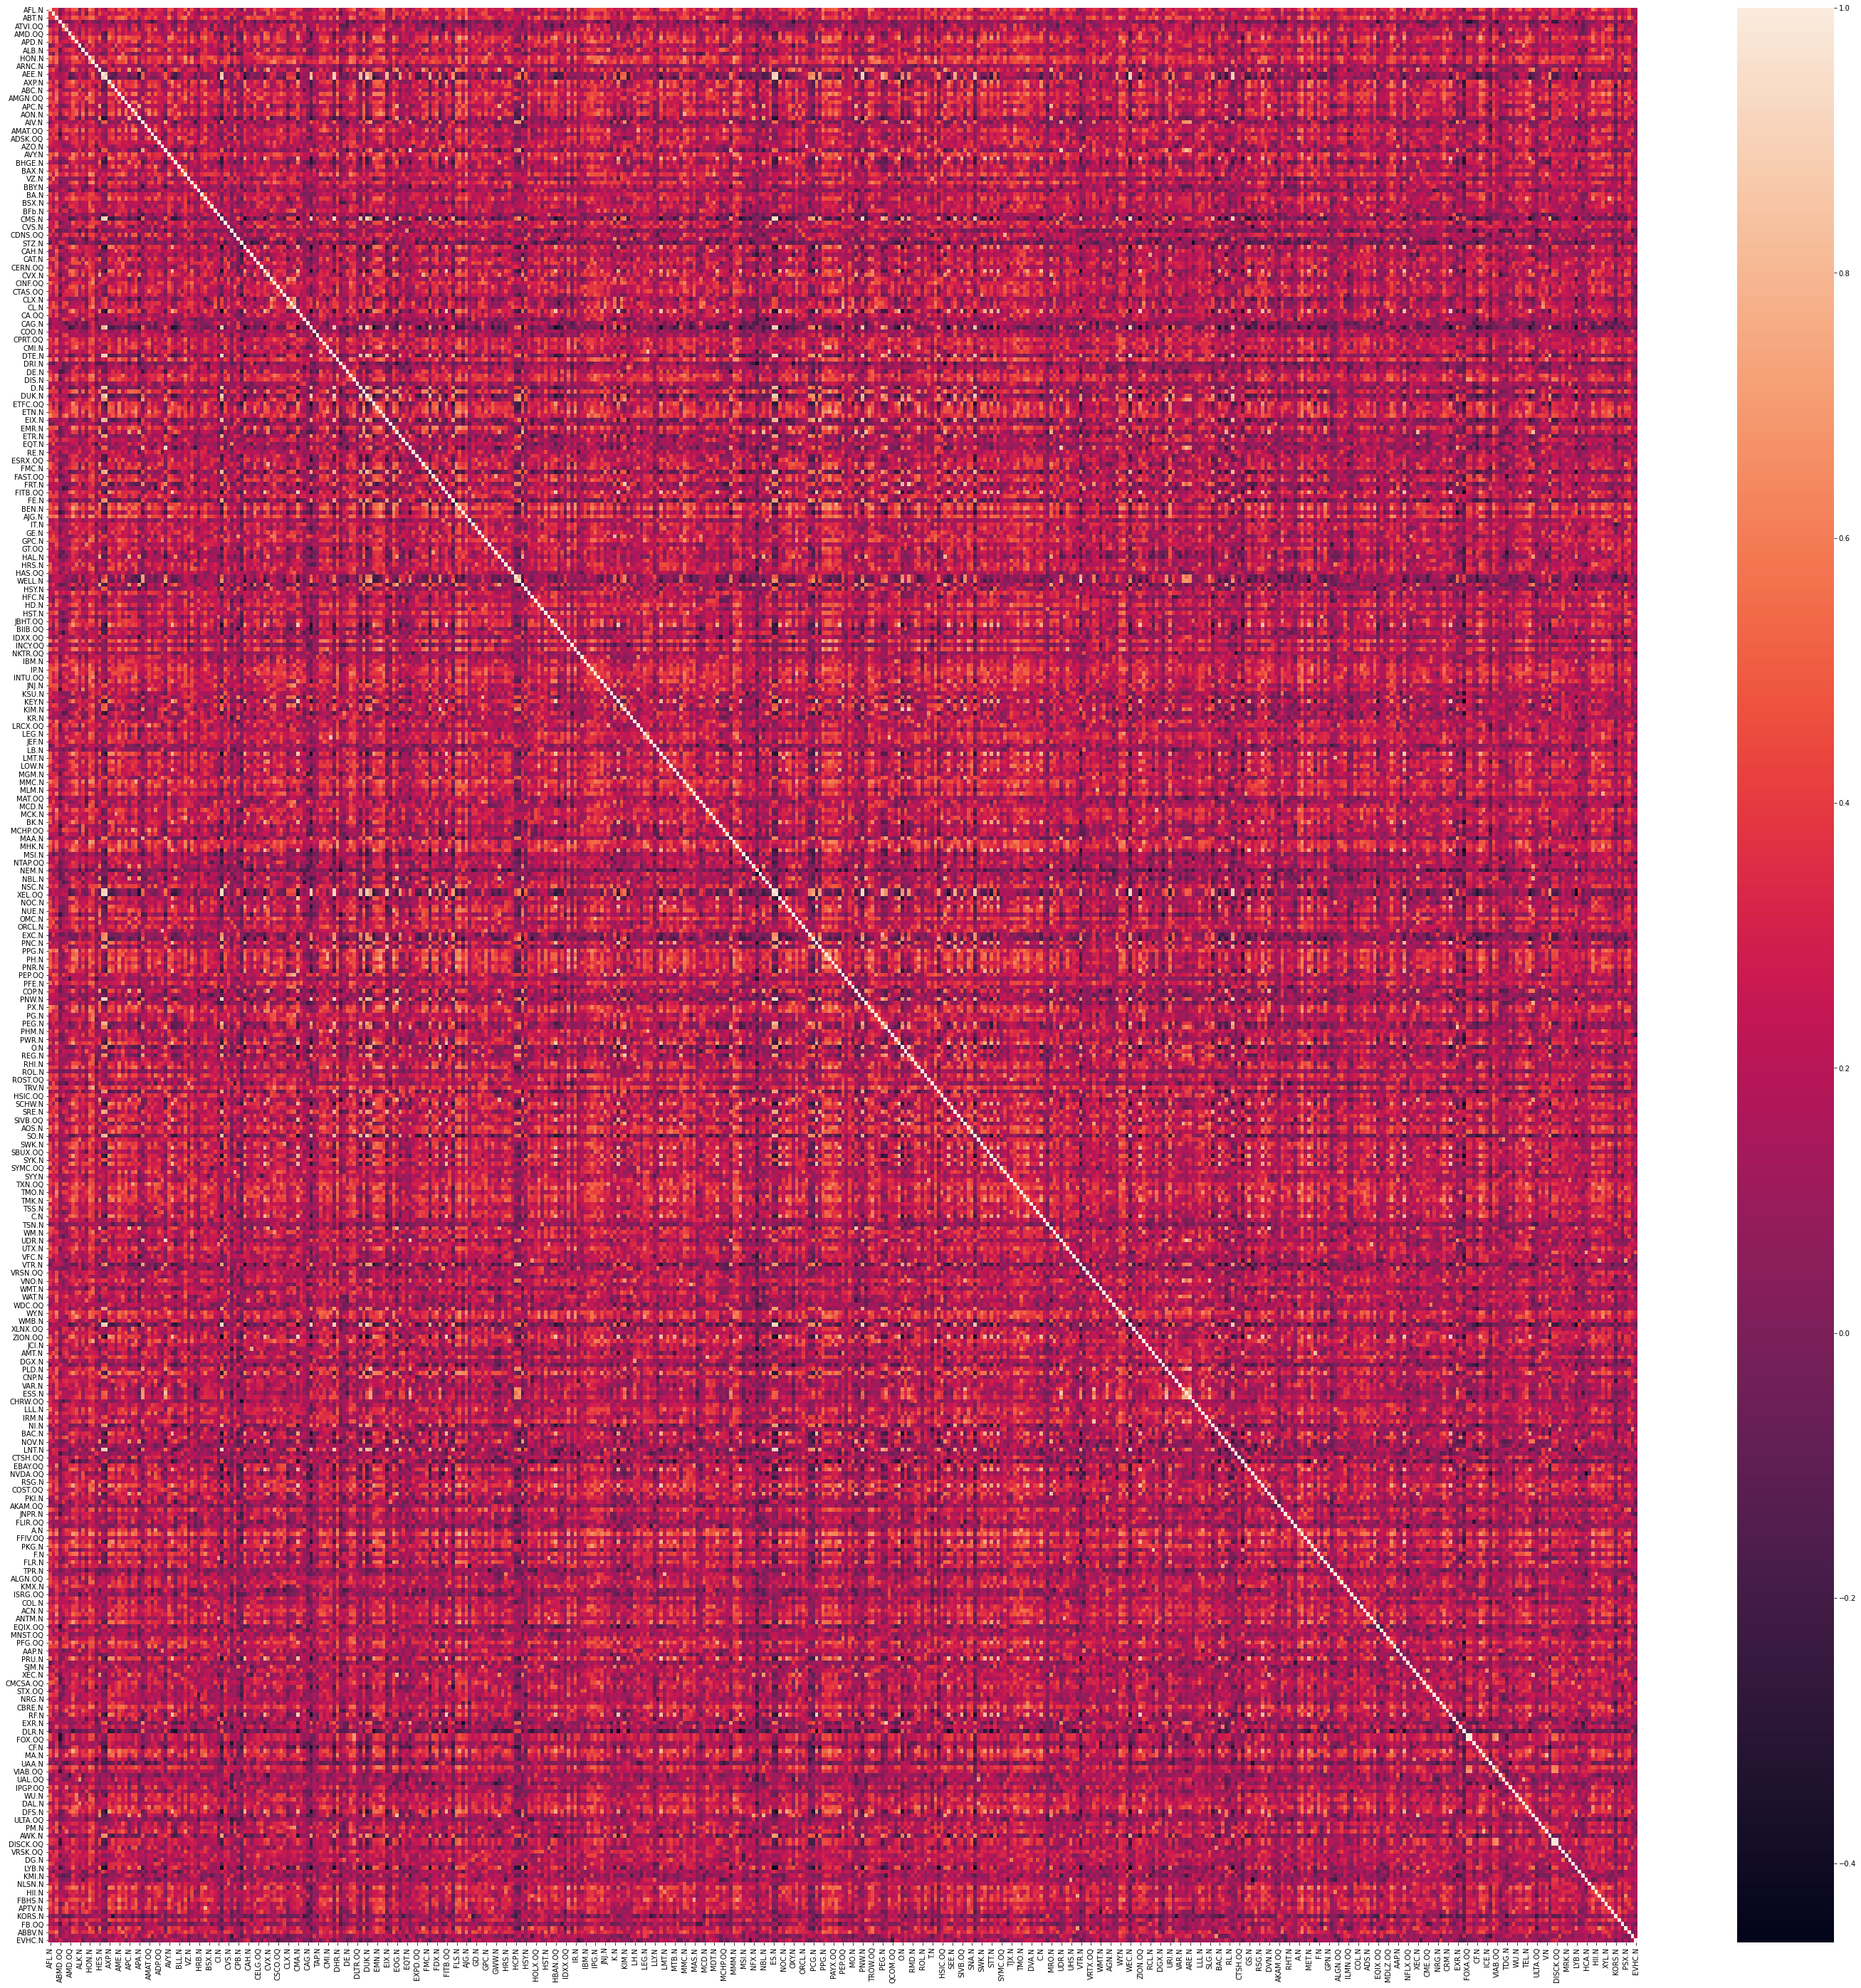

In [103]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(50,50))

sns.heatmap(sp500Returns.corr())

In [94]:
corrSort = sp500Returns.corr().mean().sort_values(ascending= False).index

<AxesSubplot:>

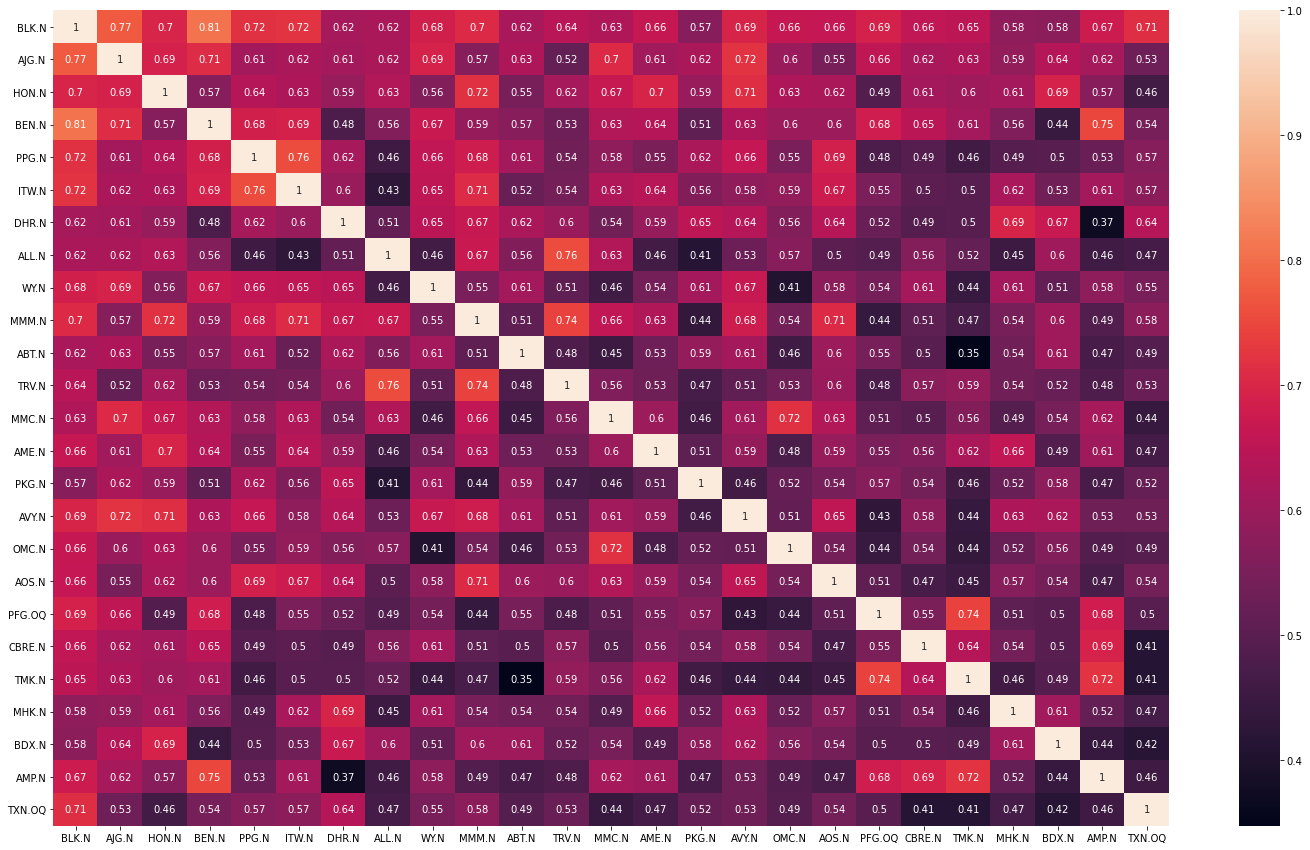

In [108]:
plt.figure(figsize=(25,15))
sns.heatmap(sp500Returns.corr().loc[corrSort].T.loc[corrSort].iloc[:25,:25], annot=True)

<AxesSubplot:>

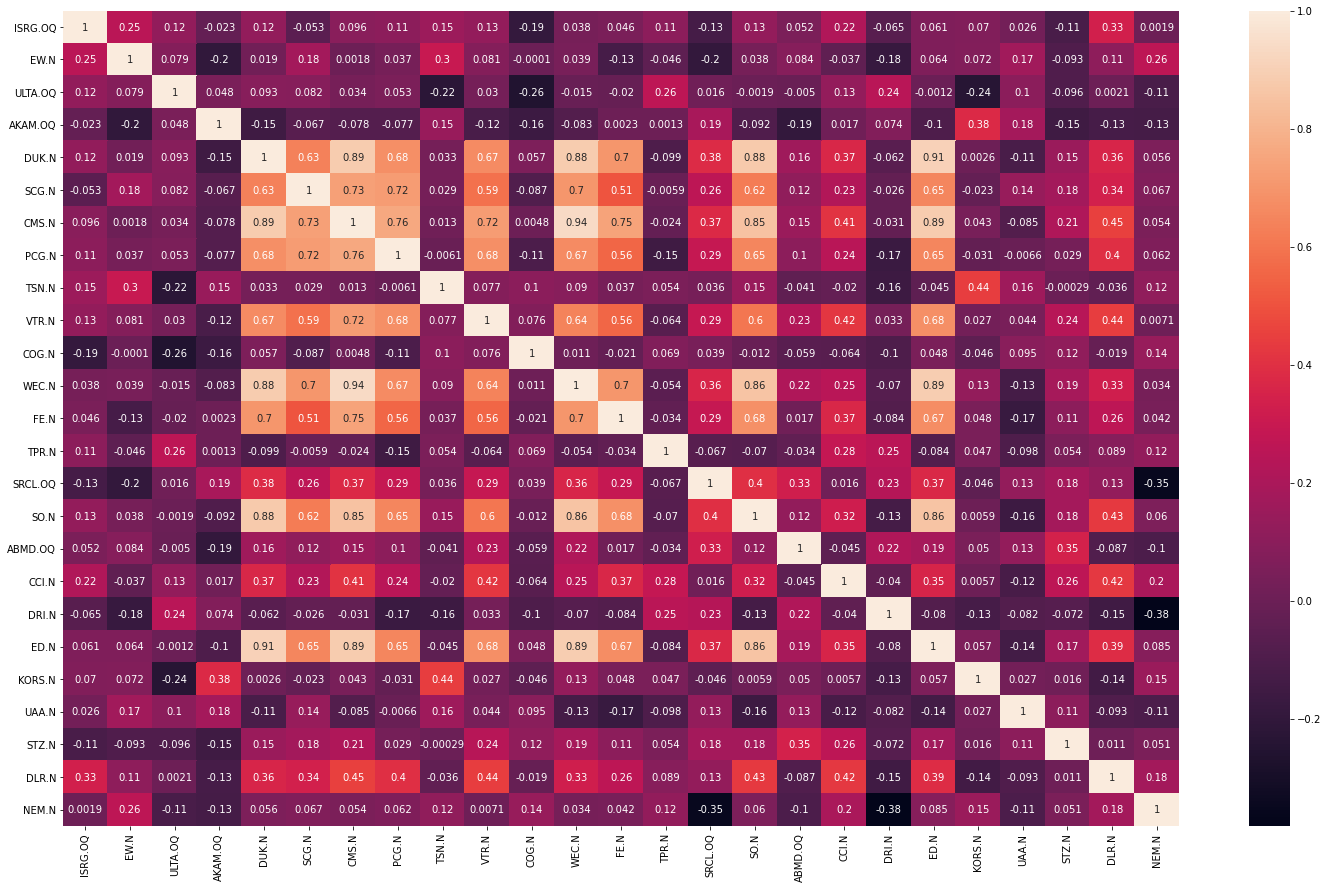

In [110]:
plt.figure(figsize=(25,15))
sns.heatmap(sp500Returns.corr().loc[corrSort].T.loc[corrSort].iloc[-25:,-25:], annot=True)